In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,AveragePooling2D

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [2]:
## veriyi okumak 
## train, validation,test

(X_train,y_train),(X_test,y_test)=mnist.load_data()## veri yüklendi

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=1)

X_train=X_train.astype("float32")/255 ##görüntü ölçeklendi
X_val=X_val.astype("float32")/255
X_test=X_test.astype("float32")/255

X_train=np.expand_dims(X_train,-1)##boyut ekleme
X_test=np.expand_dims(X_test,-1)
X_val=np.expand_dims(X_val,-1)

y_train=to_categorical(y_train,10)
y_val=to_categorical(y_val,10)
y_test=to_categorical(y_test,10)


print("Image Shape:",X_train[0].shape)
print("Train Size:",X_train.shape)
print("Validation Size:",X_val.shape)
print("Test Size:",X_test.shape)



11501568/11490434 [==============================] - 0s 0us/step
Image Shape: (28, 28, 1)
Train Size: (54000, 28, 28, 1)
Validation Size: (6000, 28, 28, 1)
Test Size: (10000, 28, 28, 1)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##model leNet 1988
model=Sequential()

#conv1
model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1),padding='valid'))

#pooling1
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#conv2
model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))

#pooling2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#flatten 4x4x16->256
model.add(Flatten())

#fc1 256->120
model.add(Dense(120,activation='tanh'))

#fc2 120->84
model.add(Dense(84,activation='tanh'))

#output 84->10
model.add(Dense(10,activation='softmax'))

model.summary()

##compile
model.compile(loss="categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [ ]:
batch_size=256
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=15)

Epoch 1/15
1688/1688 [==============================] - 25s 14ms/step - loss: 0.2514 - accuracy: 0.9259 - val_loss: 0.1152 - val_accuracy: 0.9647
Epoch 2/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0964 - accuracy: 0.9703 - val_loss: 0.0806 - val_accuracy: 0.9738
Epoch 3/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 4/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0627 - val_accuracy: 0.9807
Epoch 5/15
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.0669 - val_accuracy: 0.9790
Epoch 6/15
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 7/15
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0514 -

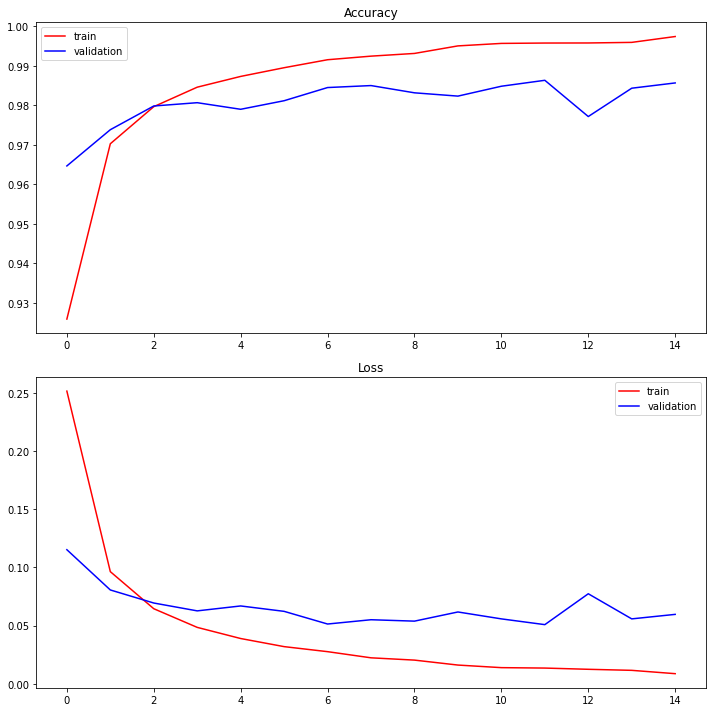

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
score=model.evaluate(X_test,y_test)
print("Loss:",score[0])
print("Accuracy",score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0536 - accuracy: 0.9863
Loss: 0.053590502589941025
Accuracy 0.986299991607666


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 974    0    0    0    0    0    3    1    2    0]
 [   0 1130    1    3    0    0    1    0    0    0]
 [   2    3 1017    4    2    0    0    3    1    0]
 [   0    1    0 1002    0    2    0    0    5

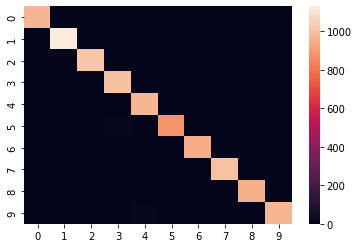

In [ ]:
y_pred=np.argmax(model.predict(X_test),axis=1)
y_pred[0]

y_test[0]

y_true=np.argmax(y_test,1)

print(y_true)
print(y_pred)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_true,y_pred))

print(confusion_matrix(y_true,y_pred))

import seaborn as sns

sns.heatmap(confusion_matrix(y_true,y_pred))